<a href="https://colab.research.google.com/github/CyShahedB/AiMl_Module4_shahed/blob/main/Mohammad_Shahed_Module_4_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Things to try**
# AIML Module 4_Lab 2

 1) Change the coefficients array and try a different polynomial instead of our  x2

In [329]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [330]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -5, 2, 8]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

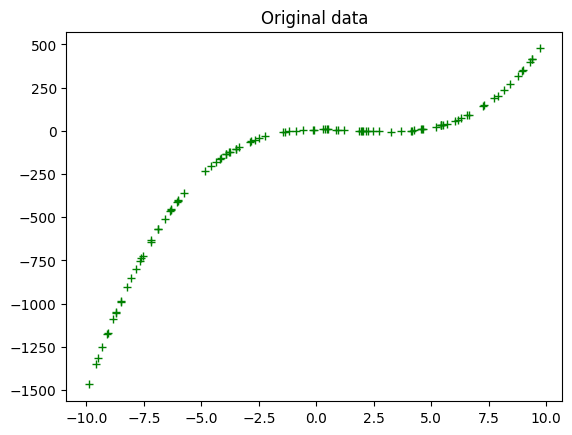

In [331]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

jitter to the values

In [332]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


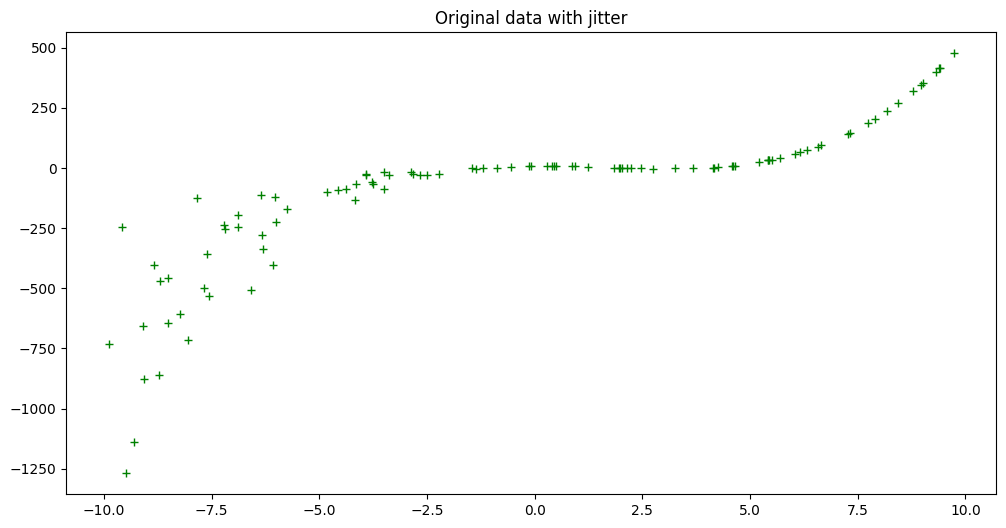

In [333]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

Mean Squared Error loss for the model

In [334]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

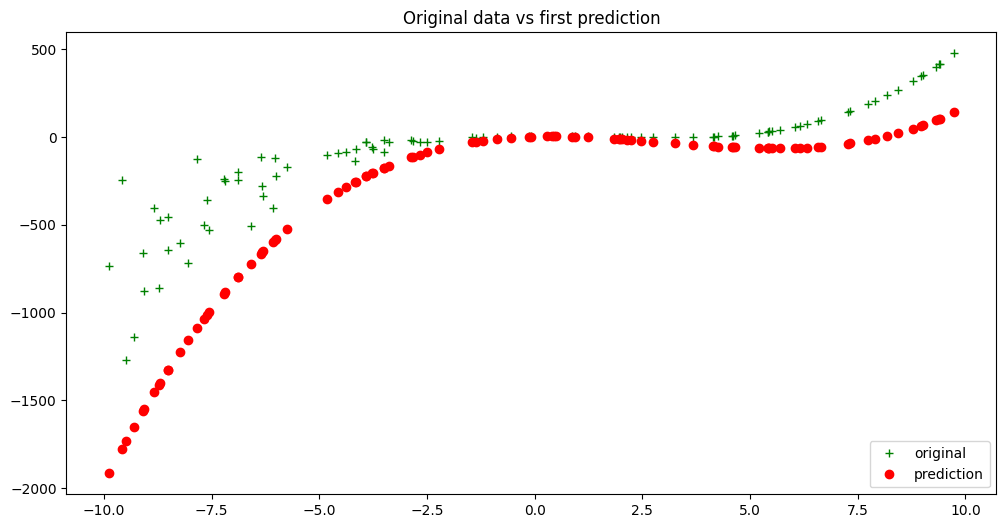

In [335]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [336]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

154856.09634579415

We can see that the loss is quite a large number

In [337]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x ** 3
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)

        x_squared = x ** 2
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)

        partial_c = x * (y - y_bar)
        c_s.append(partial_c)

        partial_d = (y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d)   # return calculated gradients as a a tuple of its 3 parts

In [338]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 30
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]

new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-4788075.738929211, 950365.7795513727, -71321.22289882816, 15632.731652701852)
Now have smaller model loss: 3.4918219927600466e+18 vs 154856.09634579415


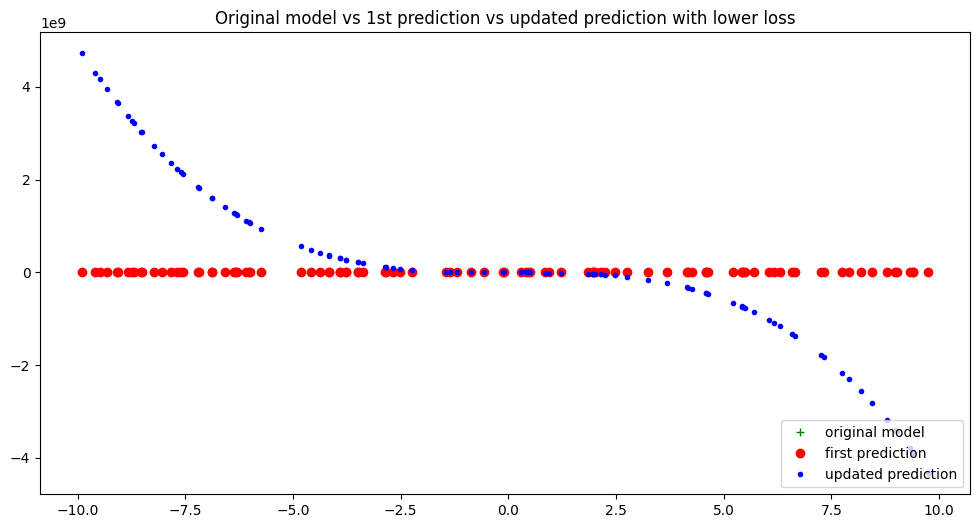

In [339]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready.

In [340]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x ** 3
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)

        x_squared = x ** 2
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)

        partial_c = x * (y - y_bar)
        c_s.append(partial_c)

        partial_d = (y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d

    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [341]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [342]:
GD = gradient_descent(30000, 30)


<ipython-input-334-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-330-6436d116cae3>:15: RuntimeWarning: overflow encountered in multiply
  a = coeffs[0] * (x * x * x)
<ipython-input-330-6436d116cae3>:19: RuntimeWarning: overflow encountered in add
  y = a + b + c + d
<ipython-input-340-97a8fd3f4fe0>:23: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_cubed * (y - y_bar)
<ipython-input-340-97a8fd3f4fe0>:27: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_squared * (y - y_bar)
<ipython-input-340-97a8fd3f4fe0>:30: RuntimeWarning: overflow encountered in double_scalars
  partial_c = x * (y - y_bar)
<ipython-input-340-97a8fd3f4fe0>:40: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-340-97a8fd3f4fe0>:42: RuntimeWarning: invalid value encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)


[3.4918219927600466e+18, 2.870185680895551e+32, 2.360259281510913e+46, 1.940928205482042e+60, 1.5960968052984899e+74, 1.3125292345635031e+88, 1.0793411689472573e+102, 8.875820273609825e+115, 7.298914170601114e+129, 6.00216615789303e+143, 4.93580246936777e+157, 4.058892302503156e+171, 3.337776749690229e+185, 2.7447768505466608e+199, 2.2571311757133033e+213, 1.8561221628498707e+227, 1.5263576705211748e+241, 1.2551801734761504e+255, 1.0321809221489163e+269, 8.488004181086056e+282, 6.979998702954126e+296, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

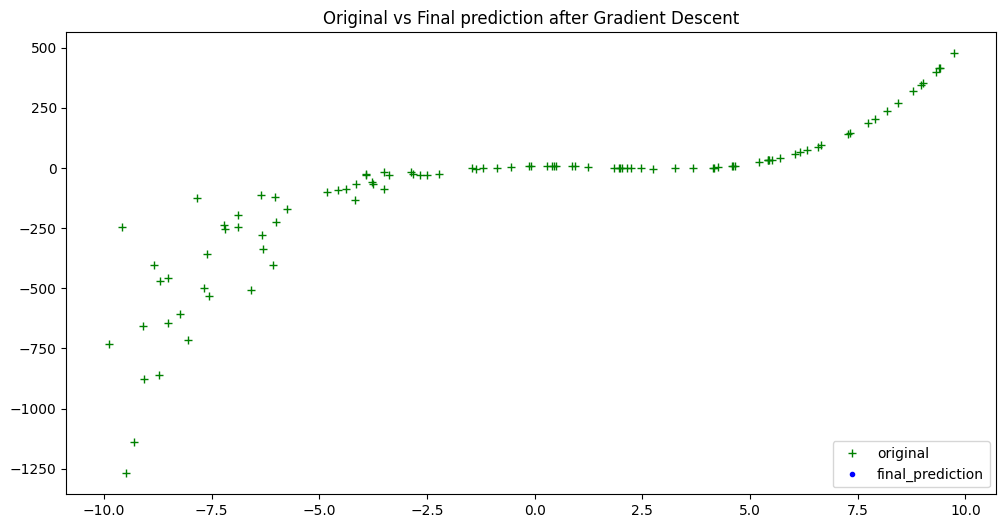

In [343]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [344]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (nan, nan, nan, nan)
Original Coefficients: [1, -5, 2, 8]


Not too far off!

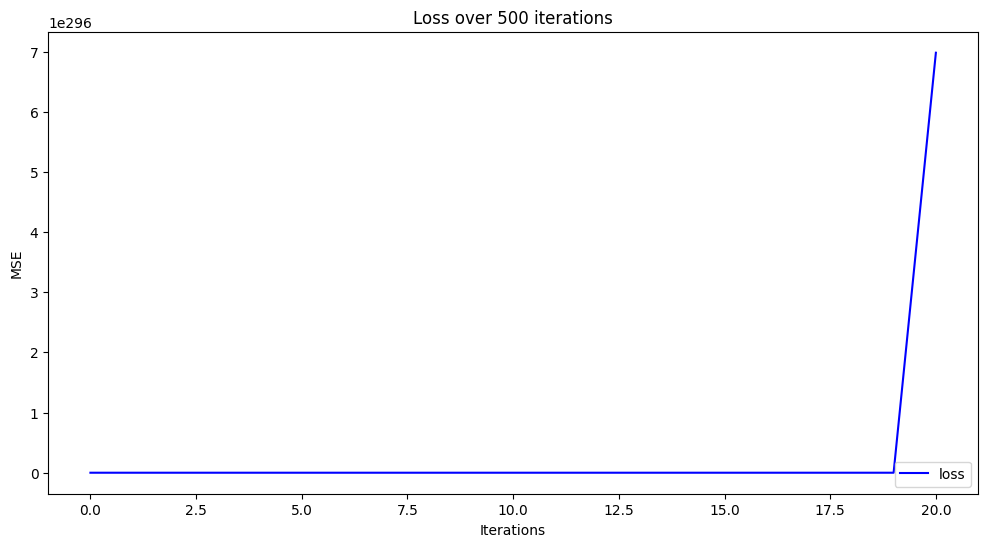

In [345]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

2) Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

ANS: decrese in learning rate is leading to many no. of iterations, and increse in learning rate is leading to less no. of iterations.

3) Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?

In [346]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x * x * x)
    b = coeffs[1] * (x * x * x * x)
    c = coeffs[2] * (x * x * x)
    d = coeffs[3] * (x * x)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -5, 2, 8, 3, 4]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

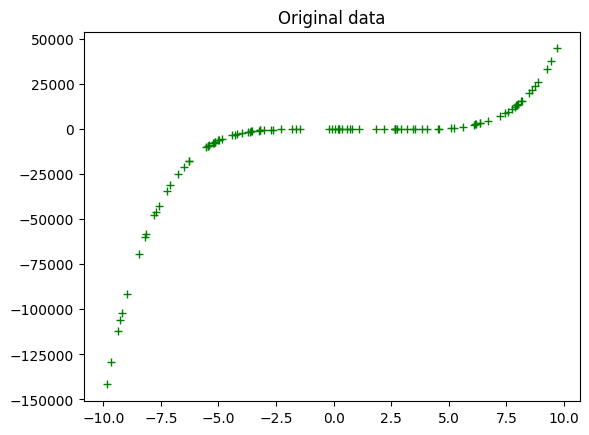

In [347]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [348]:
def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x * x * x)
    b = coeffs[1] * (x * x * x * x)
    c = coeffs[2] * (x * x * x)
    d = coeffs[3] * (x * x)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


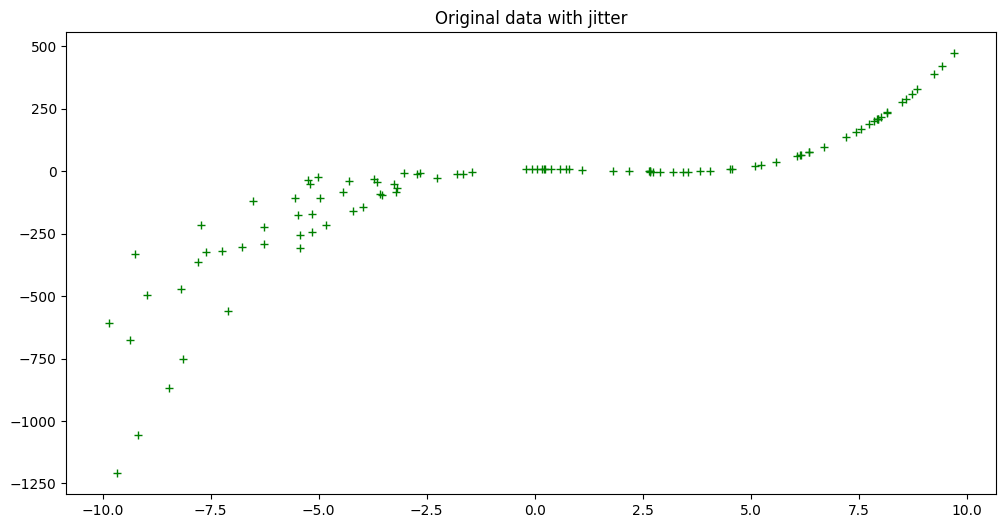

In [349]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [350]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

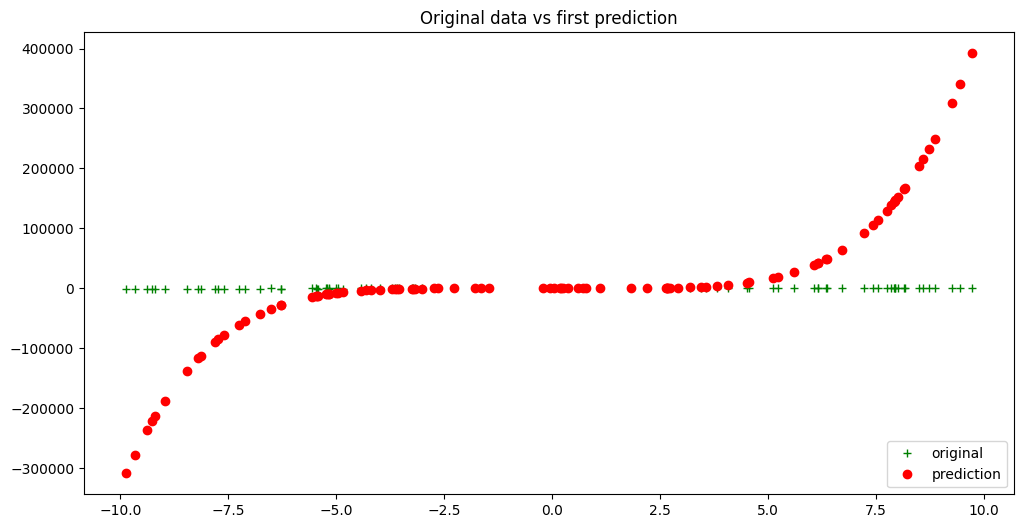

In [351]:
rand_coeffs = (4,6,-8,2,3,5)
y_bar = eval_5th_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [352]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

12272503350.260902

In [353]:
def calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_fifth = x ** 5
        partial_a = x_fifth * (y-y_bar)
        a_s.append(partial_a)

        x_fourth = x ** 4
        partial_b = x_fourth * (y-y_bar)
        b_s.append(partial_b)

        x_cubed = x ** 3
        partial_c = x_cubed * (y - y_bar)
        c_s.append(partial_c)

        x_squared = x ** 2
        partial_d = x_squared * (y - y_bar)
        d_s.append(partial_d)

        partial_e = x * (y - y_bar)
        e_s.append(partial_e)

        partial_f = (y - y_bar)
        f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(d_s)
    gradient_f = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)   # return calculated gradients as a a tuple of its 3 parts

In [354]:
calc_grad = calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
e_new = rand_coeffs[4] - lr * calc_grad[4]
f_new = rand_coeffs[5] - lr * calc_grad[5]

new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_5th_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-615046.8112285414, -10248.6484030722, -7858.289221103116, -168.4511944227849, -167.4511944227849, -165.4511944227849)
Now have smaller model loss: 3.0053133867089376e+20 vs 12272503350.260902


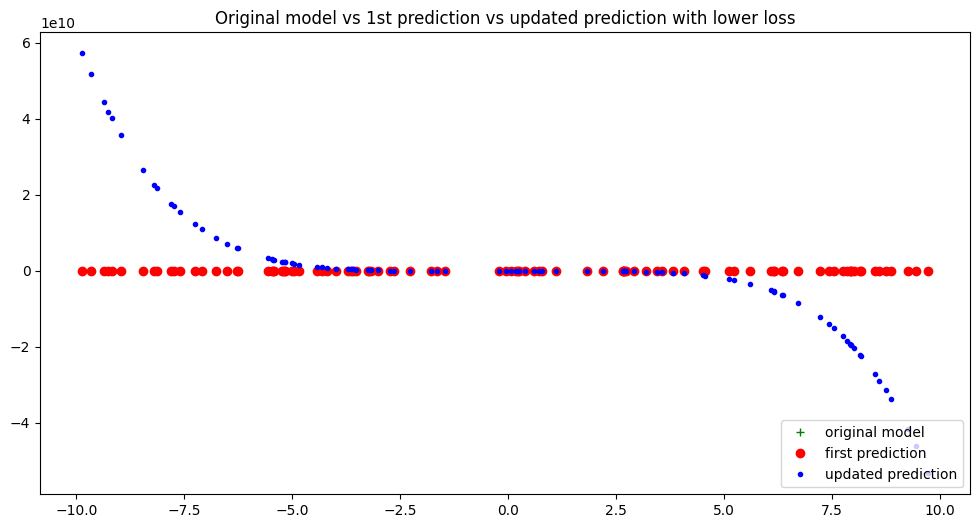

In [355]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [356]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
       x_fifth = x ** 5
       partial_a = x_fifth * (y - y_bar)
       a_s.append(partial_a)

       x_fourth = x ** 4
       partial_b = x_fourth * (y - y_bar)
       b_s.append(partial_b)

       x_cubed = x ** 3
       partial_c = x_cubed * (y - y_bar)
       c_s.append(partial_c)

       x_squared = x ** 2
       partial_d = x_squared * (y - y_bar)
       d_s.append(partial_d)

       partial_e = x * (y - y_bar)
       e_s.append(partial_e)

       partial_f = (y - y_bar)
       f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [357]:
def gradient_descent_5(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [358]:
GD = gradient_descent_5(30000, 0.0001)


<ipython-input-350-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-356-0c5558fb0aff>:25: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_fifth * (y - y_bar)
<ipython-input-356-0c5558fb0aff>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_fourth * (y - y_bar)
<ipython-input-356-0c5558fb0aff>:33: RuntimeWarning: overflow encountered in double_scalars
  partial_c = x_cubed * (y - y_bar)
<ipython-input-356-0c5558fb0aff>:37: RuntimeWarning: overflow encountered in double_scalars
  partial_d = x_squared * (y - y_bar)
<ipython-input-356-0c5558fb0aff>:50: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-356-0c5558fb0aff>:52: RuntimeWarning: invalid value encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-356-0c5558fb0aff>:53: RuntimeWarning: overflow encountered in double

[3.005313277236054e+20, 7.586491666181884e+30, 1.915112864689611e+41, 4.83445767663117e+51, 1.22039705638597e+62, 3.08073640283348e+72, 7.776925332685912e+82, 1.9631854115965695e+93, 4.955810677655698e+103, 1.2510310706105267e+114, 3.158068056734697e+124, 7.972139210020476e+134, 2.0124646601080204e+145, 5.080209842664411e+155, 1.2824340500030969e+166, 3.237340864929285e+176, 8.172253283290311e+186, 2.062980900459118e+197, 5.207731635485489e+207, 1.3146252968799047e+218, 3.318603553647714e+228, 8.377390555637022e+238, 2.1147651832209925e+249, 5.3384544393175235e+259, 1.347624598077697e+270, 3.401906072230609e+280, 8.587677117787564e+290, 2.167849338386225e+301, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

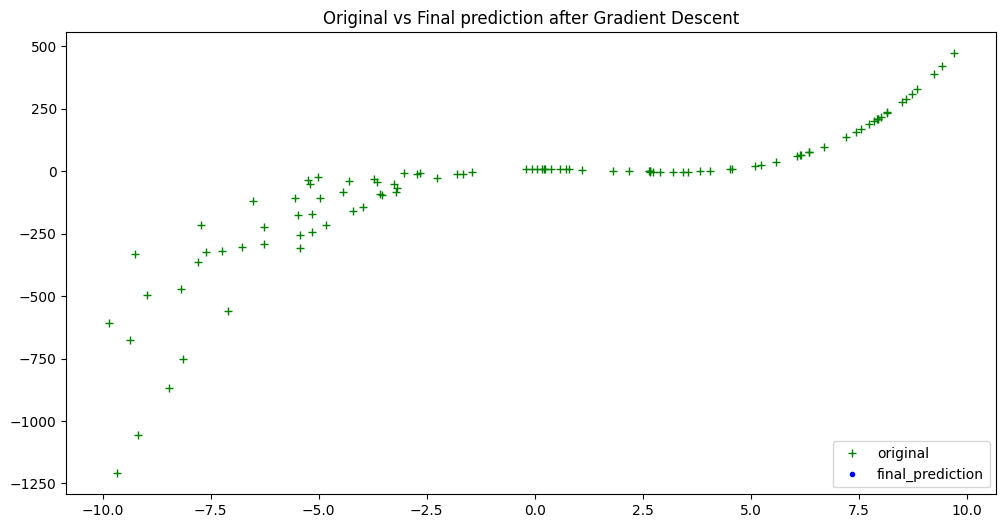

In [359]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [360]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (nan, nan, nan, nan, nan, nan)
Original Coefficients: [1, -5, 2, 8, 3, 4]


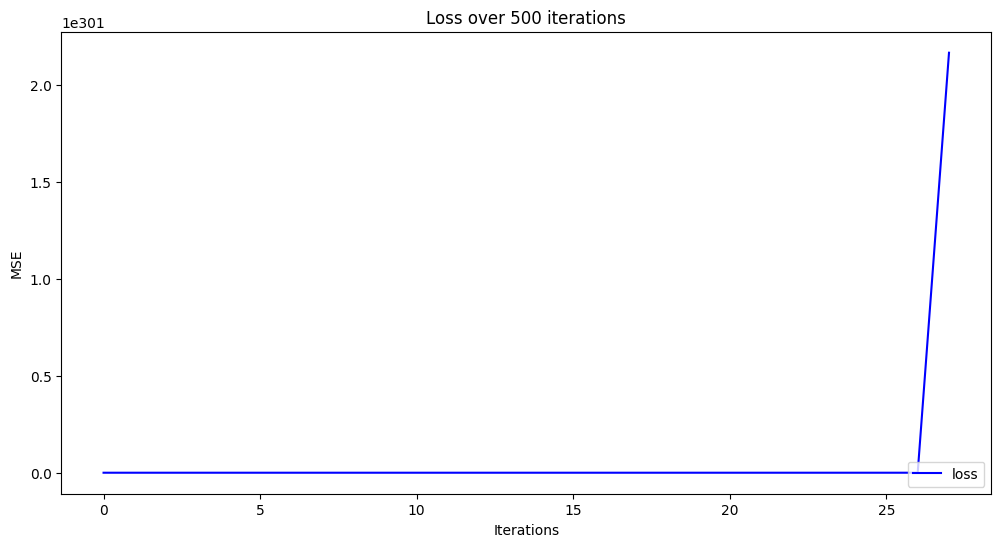

In [361]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**Why does initialization not matter in our case of x2 ?**

1) In the context of fitting a second-degree polynomial (e.g. y=x^2), the model is relatively simple, and the optimization landscape is likely to be well-behaved.

2) Here are a few reasons why initialization may not matter as much for simpler models like y=x^2:
>>**Convexity of the Optimization Landscape:**
For a second-degree polynomial, the optimization landscape is convex. It has a single minimum, and there are no local minima or other complexities that can trap the optimization algorithm. In such cases, gradient descent is likely to converge to the global minimum regardless of the initial values.

>>**Smoothness of the Loss Function:**
The loss function associated with simpler models is often smooth and well-behaved. This means that the gradients change gradually, making it easier for the optimization algorithm to navigate toward the minimum. In contrast, more complex models may have non-convex and irregular landscapes, making convergence sensitive to initialization.

>>**Unique Global Minimum:**
For a second-degree polynomial, the minimum is unique. This simplifies the optimization process because there is only one optimal set of parameters to find. In more complex models, especially with higher-degree polynomials, there may be multiple local minima, making the choice of initialization more critical.

## 4) Can you modify the algorithm to find a maxima of a function, instead of a minima?

To modify the algorithm to find the maxima of a function, we need to change the sign of the gradient updates in the gradient descent algorithm. In other words, instead of subtracting the gradient from the current coefficients, we should add it, as shown below:

In [362]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
       x_fifth = x ** 5
       partial_a = x_fifth * (y - y_bar)
       a_s.append(partial_a)

       x_fourth = x ** 4
       partial_b = x_fourth * (y - y_bar)
       b_s.append(partial_b)

       x_cubed = x ** 3
       partial_c = x_cubed * (y - y_bar)
       c_s.append(partial_c)

       x_squared = x ** 2
       partial_d = x_squared * (y - y_bar)
       d_s.append(partial_d)

       partial_e = x * (y - y_bar)
       e_s.append(partial_e)

       partial_f = (y - y_bar)
       f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)


    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c
    d_new = coeffs[3] + lr * gradient_d
    e_new = coeffs[4] + lr * gradient_e
    f_new = coeffs[5] + lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In this modified version, the signs of the terms involving the gradients are changed from subtraction to addition. Now, when we perform gradient descent with this modified function, it will attempt to find the maxima of the function instead of the minima.

**reason:**
In gradient descent, the algorithm aims to minimize a loss function, which means moving in the direction opposite to the gradient. This is because the gradient points in the direction of the steepest ascent, and by subtracting the gradient from the current position, we move in the opposite direction, descending towards a local minimum.

Conversely, if we want to maximize a function, we should move in the direction of the gradient, as it points toward the steepest ascent. Therefore, to adapt gradient descent for maximizing a function, we need change the sign of the gradient update to "+" so that we can move in the direction of increasing values.